In [4]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import scipy.interpolate as spi
from scipy.stats import norm
from scipy.interpolate import CubicSpline
from scipy.interpolate import Akima1DInterpolator
from analysis.TabPFN_copy import compute_cdf_pdf_interpolators, plot_cdf_pdf_dynamic, train_tabpfn_model, fit_tail_distribution
from analysis.TabPFN_copy import evaluate
from analysis.datasets import load_entsoe


In [2]:
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
quantiles = norm.ppf(probabilities)
y_min = -5
y_max = 5
ys = [2.5, 1.5, 0.5, 0.01, -0.5,-1.5, -2.5]

crps_linear_a = []
crps_hybrid_a = []
crps_normal_a = []
nll_linear_a = []
nll_hybrid_a = []
nll_normal_a = []

for y in ys:
    #print("ys", ys)
    crps_linear, crps_hybrid, crps_normal, nll_linear, nll_hybrid, nll_normal = evaluate(quantiles, probabilities, y, y_min, y_max)
    crps_linear_a.append(crps_linear)
    crps_hybrid_a.append(crps_hybrid)
    crps_normal_a.append(crps_normal)

    nll_linear_a.append(nll_linear)
    nll_hybrid_a.append(nll_hybrid)
    nll_normal_a.append(nll_normal)

print(f"crps linear {crps_linear_a}")
print(f"crps hybrid {crps_hybrid_a}")
print(f"crps normal {crps_normal_a}")

print(f"nll linear {nll_linear_a}")
print(f"nll hybrid {nll_hybrid_a}")
print(f"nll normal {nll_normal_a}")

C:\Users\Minu\Documents\master-thesis\src\analysis\TabPFN_copy.py:306: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  crps_value, _ = quad(integrand, y_min, y_max)
C:\Users\Minu\Documents\master-thesis\src\analysis\TabPFN_copy.py:306: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  crps_value, _ = quad(integrand, y_min, y_max)


3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
3.0814879110195774e-33 1.0
crps linear [1.843285466033733, 1.0046430201514638, 0.3524551601240792, 0.25541901749398094, 0.3524551601240792, 1.0046430201514638, 1.843285466033733]
crps hybrid [1.9422956161135025, 0.9969008896256834, 0.3305245615914499, 0.23282793409925642, 0.33052456159144994, 0.9969008896256829, 1.9422956161135025]
crps normal [1.9398186908105002, 0.9944240039774529, 0.3314035312548559, 0.23373487115070068, 0.3314035312548559, 0.9944240039774529, 1.9398186908105002]
nll linear [3.6158915867618404, 3.6158915867618404, 0.9971456987656455, 0.9295903116304486, 0.9971456987656531, 3.6158915867619434, 3.6158915867619434]
nll hybrid [4.043938533204672, 2.0439385332046727, 1.0549742522758192, 0.9271129797351108, 1.0549742522758196, 2.0439385332046727, 4.043938533204672]
nll normal [4.043938533204672, 2.043938533204672

<Figure size 1100x600 with 0 Axes>

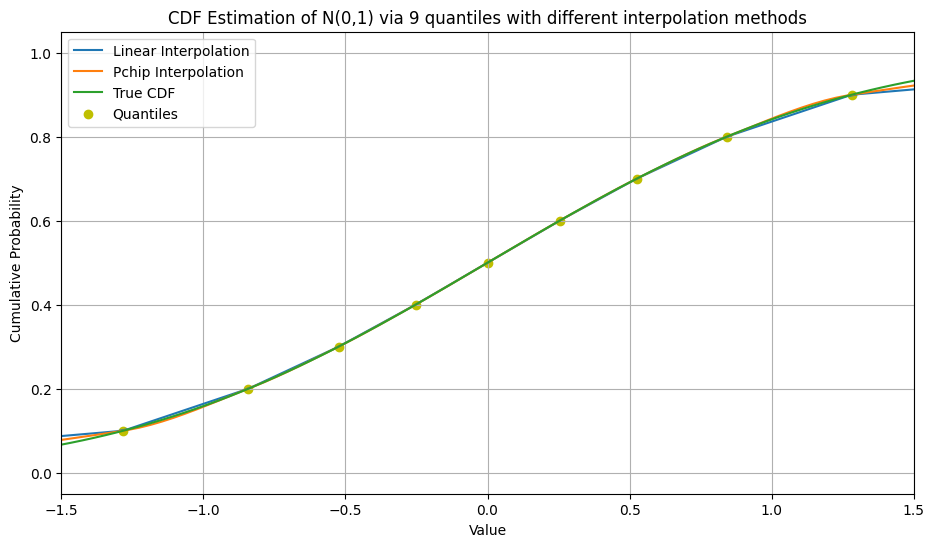

mu 3.0814879110195774e-33
sigma 1.0
epsilon 0.12667355156789986
Step cdf_chip 0.03349097160643472 0.0569872753350617
epsilon 0.12667355156789986
Step cdf_chip 0.03037044298855726 0.05280911150029423
epsilon 0.12667355156789986
Step cdf_chip 0.027412221771850553 0.04880277915304641
epsilon 0.12667355156789986
Step cdf_chip 0.024614796678551987 0.044966767015555686
epsilon 0.12667355156789986
Step cdf_chip 0.021976656430899084 0.0412995638100596
epsilon 0.12667355156789986
Step cdf_chip 0.019496289751129256 0.037799658258795464
epsilon 0.12667355156789986
Step cdf_chip 0.017172185361479988 0.0344655390840008
epsilon 0.12667355156789986
Step cdf_chip 0.015002831984188765 0.03129569500791312
epsilon 0.12667355156789986
Step cdf_chip 0.012986718341493002 0.02828861475276982
epsilon 0.12667355156789986
Step cdf_chip 0.011122333155630205 0.025442787040808403
epsilon 0.12667355156789986
Step cdf_chip 0.009408165148837792 0.02275670059426629
epsilon 0.12667355156789986
Step cdf_chip 0.007842703

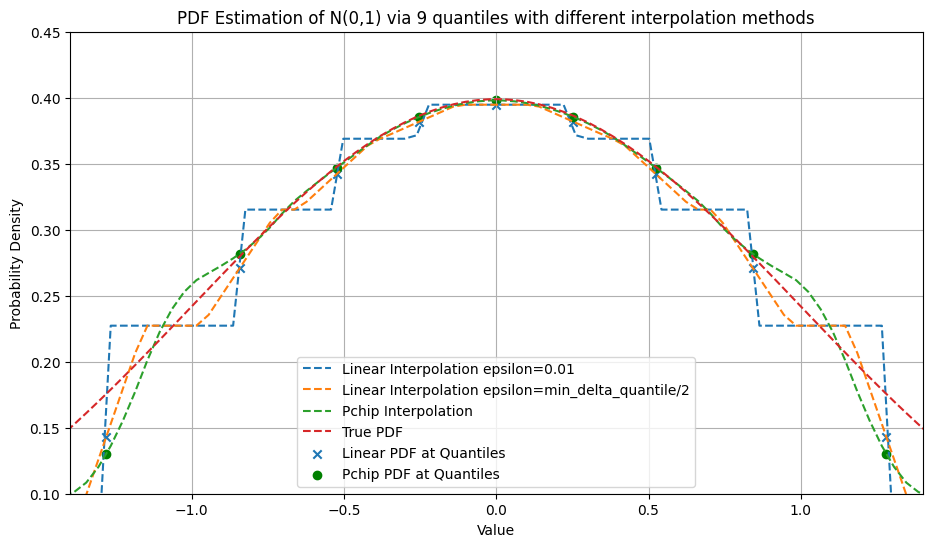

In [3]:
plot_cdf_pdf_dynamic(quantiles, probabilities, -3, 3, case=1)

In [2]:
entsoe = load_entsoe()
X_validation, y_validation, quantiles_custom, all_quantiles = train_tabpfn_model(entsoe, case=5)
pd.DataFrame(all_quantiles)

Data loaded and transformed successfully. Shape of DataFrame: (78912, 22)
# of training observations: 8640 | 2.74%
# of validation observations: 8736 | 2.77%
# of test observations: 298173 | 94.49%
model successfully called
model fit


c:\Users\Minu\Documents\master-thesis\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Minu\Documents\master-thesis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Minu\Documents\master-thesis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Minu\Documents\master-thesis\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This func

quantiles calculated
model quantiles finished


,0,1,2,3,4,5,6,7,8,9,...,8726,8727,8728,8729,8730,8731,8732,8733,8734,8735
0,-3.753958,-3.749815,-3.738164,-3.704320,-3.666728,-3.711720,-3.740562,-3.763759,-3.767437,-3.690713,...,-3.265193,-3.277719,-3.276180,-3.264122,-3.259285,-3.271677,-3.268896,-3.233629,-3.108202,-3.042307
1,-3.718361,-3.721812,-3.699534,-3.646739,-3.603847,-3.661691,-3.698350,-3.725682,-3.721777,-3.623314,...,-3.248673,-3.263224,-3.258692,-3.244090,-3.240196,-3.256967,-3.254087,-3.206582,-3.076627,-3.018422
2,-3.685742,-3.693653,-3.664368,-3.595999,-3.551156,-3.614528,-3.659709,-3.687873,-3.677516,-3.504995,...,-3.236119,-3.252438,-3.247787,-3.231645,-3.226322,-3.247503,-3.243183,-3.186259,-3.060323,-3.004065
3,-3.651062,-3.665078,-3.629156,-3.551047,-3.504442,-3.567276,-3.613273,-3.645754,-3.627320,-3.304080,...,-3.225000,-3.242841,-3.237366,-3.219641,-3.214955,-3.238339,-3.234965,-3.170412,-3.046973,-2.992996
4,-3.610862,-3.635031,-3.591392,-3.509047,-3.457302,-3.523459,-3.560158,-3.586238,-3.561510,-3.237144,...,-3.216122,-3.235282,-3.226984,-3.208587,-3.205511,-3.230810,-3.225606,-3.151501,-3.035074,-2.981049
5,-3.567971,-3.596139,-3.556051,-3.463033,-3.407983,-3.476679,-3.504647,-3.522114,-3.481435,-3.192605,...,-3.206859,-3.225990,-3.218441,-3.197016,-3.193835,-3.221507,-3.218275,-3.132516,-3.025901,-2.968266
6,-3.523682,-3.559605,-3.518189,-3.409359,-3.346178,-3.424096,-3.443520,-3.447227,-3.383212,-2.993877,...,-3.195616,-3.218129,-3.207676,-3.183520,-3.180582,-3.212221,-3.208688,-3.107642,-3.013481,-2.952348
7,-3.449133,-3.515109,-3.471913,-3.325577,-3.266977,-3.363062,-3.381932,-3.373388,-3.304317,-2.276907,...,-3.181673,-3.207131,-3.194401,-3.165218,-3.161997,-3.200728,-3.196994,-3.080007,-2.997881,-2.927825
8,-2.061650,-3.436965,-3.371308,-2.718620,-3.131786,-3.277773,-3.313328,-3.302503,-3.180895,-2.241776,...,-3.158978,-3.191097,-3.172852,-3.135550,-3.132348,-3.183947,-3.179380,-3.042610,-2.968034,-2.828589


In [3]:
all_quantiles.min()

-5.627175

In [4]:
y_validation.min()

-11.512925464970229

In [ ]:
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_min = -13
y_max = 0

#y_validation.shape[0]
crps_linear_a = []
crps_hybrid_a = []
crps_normal_a = []
nll_linear_a = []
nll_hybrid_a = []
nll_normal_a = []

#problematic range: 6265 - 6270
#6200, 6400
print("mu_left, sigma_left, mu_right, sigma_right")
for i in range(6200, 6800):
    y = y_validation[i]
    quantiles = all_quantiles[:, i]
    crps_linear, crps_hybrid, crps_normal, nll_linear, nll_hybrid, nll_normal = evaluate(quantiles, probabilities, y, y_min, y_max)
    crps_linear_a.append(crps_linear)
    crps_hybrid_a.append(crps_hybrid)
    crps_normal_a.append(crps_normal)

    nll_linear_a.append(nll_linear)
    #print(f"{i}. nll linear", nll_linear)
    nll_hybrid_a.append(nll_hybrid)
    #print(f"{i}. nll hybrid", nll_hybrid)
    nll_normal_a.append(nll_normal)

    # Check for infinite values and print only those cases
    if np.isinf(nll_linear) or np.isinf(nll_hybrid) or np.isinf(nll_normal):
        print(f"⚠️ Infinite Value Found at index {i}:")
        if np.isinf(nll_linear):
            print(f"   → NLL Linear is infinite: {nll_linear}")
        if np.isinf(nll_hybrid):
            print(f"   → NLL Hybrid is infinite: {nll_hybrid}")
        if np.isinf(nll_normal):
            print(f"   → NLL Normal is infinite: {nll_normal}")

print(f"Mean CRPS Linear: {np.mean(crps_linear_a)}")
print(f"Mean CRPS Hybrid: {np.mean(crps_hybrid_a)}")
print(f"Mean CRPS Normal: {np.mean(crps_normal_a)}")
print(f"Mean NLL Linear: {np.mean(nll_linear_a)}")
print(f"Mean NLL Hybrid: {np.mean(nll_hybrid_a)}")
print(f"Mean NLL Normal: {np.mean(nll_normal_a)}")

mu_left, sigma_left, mu_right, sigma_right
-1.4584138693673678 1.418724690766151 -1.6064382039404954 0.40689078087338576
-1.4920819016121982 1.3849375958211623 -1.580030650989285 0.3876736389960306
-1.5314159795084108 1.3007982778661178 -1.5044926377701668 0.3121965183984419


C:\Users\Minu\AppData\Local\Temp\ipykernel_15612\1398128972.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_validation[i]
C:\Users\Minu\Documents\master-thesis\src\analysis\TabPFN_copy.py:309: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  crps_value, _ = quad(integrand, y_min, y_max)


-1.5800623793056077 1.2447577873637194 -1.4946688123816543 0.3024021953939297
-1.5539863214015777 1.301383579780345 -1.5048322447907863 0.31593486340246046
-1.5063237204689024 1.3101907477508157 -1.5169013232839317 0.3178465786824946
-1.513917370929199 1.2961689732815531 -1.5137109654961567 0.3150834658957465
-1.7222405371900622 1.1688880267320034 -1.4919211898775668 0.30012873101413007
-1.5146205176900596 1.725567051514955 -1.6458935659610217 0.43149188744230693
-1.7865615434851634 1.5775404037833483 -1.829287916345107 0.5761340810495161
-1.8973564546620163 1.4155239564092748 -1.9306201225926587 0.6575425320177167
-2.142586545285358 1.2540126029093306 -2.148430585113668 0.817110195410831
-2.6131641685728426 0.9851243615670837 -1.9617956962012184 0.6704560264734654
-2.5631701382027043 0.9889765152766464 -2.0276907996400424 0.7221520051282679
-2.7768690129276843 1.010518335451296 -1.9047273442194441 0.6284080453446181
-2.4943340769923648 1.165845540670455 -1.9937083913294862 0.656661056

In [7]:
pd.DataFrame(all_quantiles[:, 6265])

,0
0,-1.540781
1,-1.470611
2,-1.418557
3,-1.381020
4,-1.351824
5,-1.325140
6,-1.291688
7,-1.232119
8,-0.851166


In [8]:
y_validation[6265]

C:\Users\Minu\AppData\Local\Temp\ipykernel_16444\2510506387.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_validation[6265]


-8.966241455485985

In [9]:
np.exp(y_validation[6265]) * 17000

C:\Users\Minu\AppData\Local\Temp\ipykernel_16444\2143451977.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.exp(y_validation[6265]) * 17000


2.17

In [ ]:
for i in range(6265,6270):
    evaluate(all_quantiles[:, i], probabilities, y_validation[i], -13, 0)

mu -1.3181007239553664
sigma 0.21658681176766617


C:\Users\Minu\AppData\Local\Temp\ipykernel_6000\789480277.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  evaluate(all_quantiles[:, 6265], probabilities, y_validation[6265], -13, 0)


(6.5895867130763355,
 7.539831848651825,
 7.525944708397483,
 4.741379618819409,
 inf,
 622.8622869629597)

In [14]:
norm.logpdf(y_validation[6265],loc=-1.3181007239553664,scale=0.21658681176766617)

C:\Users\Minu\AppData\Local\Temp\ipykernel_6000\3163666741.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm.logpdf(y_validation[6265],loc=-1.3181007239553664,scale=0.21658681176766617)


-622.8622869629597

In [15]:
np.log(norm.pdf(y_validation[6265],loc=-1.3181007239553664,scale=0.21658681176766617))

C:\Users\Minu\AppData\Local\Temp\ipykernel_6000\2581327290.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.log(norm.pdf(y_validation[6265],loc=-1.3181007239553664,scale=0.21658681176766617))


-622.8622869629597

In [17]:
mu_left, sigma_left = fit_tail_distribution(all_quantiles[:,6265], probabilities)
mu_right, sigma_right = fit_tail_distribution(all_quantiles[:, 6265], probabilities)

In [18]:
mu_left, sigma_left

(-1.3363708810230264, 0.1595023588739805)

In [20]:
mu_right, sigma_right

(-1.3363708810230264, 0.1595023588739805)

In [22]:
norm.pdf(y_validation[6265],loc=mu_left,scale=sigma_left)

C:\Users\Minu\AppData\Local\Temp\ipykernel_6000\3065964618.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  norm.pdf(y_validation[6265],loc=mu_left,scale=sigma_left)


0.0

In [3]:
all_quantiles[:,28]

array([-3.8909059, -3.867643 , -3.8521323, -3.8372545, -3.8193731,
       -3.7995574, -3.767144 , -3.6567504, -3.4870744], dtype=float32)

case 1


<Figure size 1100x600 with 0 Axes>

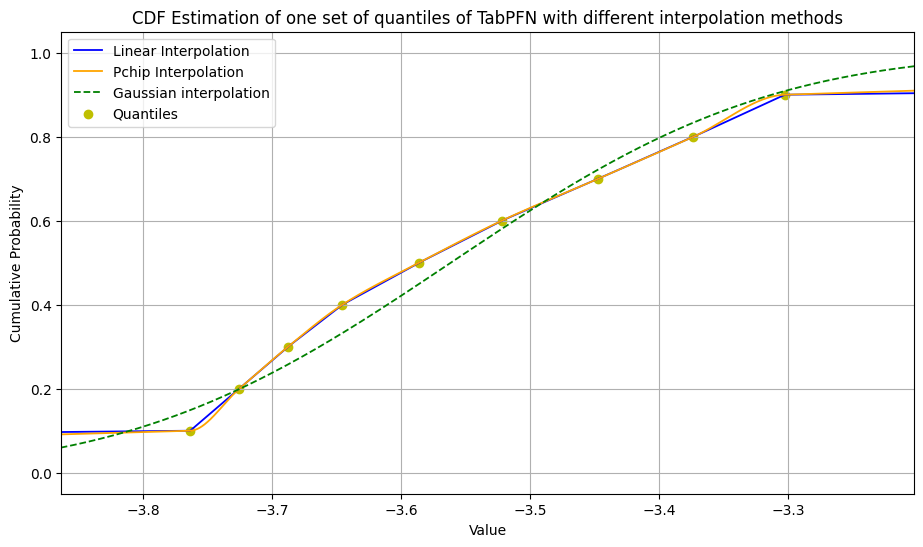

Quantiles: [-3.763759  -3.7256823 -3.6878726 -3.6457543 -3.5862384 -3.5221138
 -3.4472265 -3.373388  -3.302503 ], PDFs: [1.03496142 2.97016001 2.56086901 2.03051488 1.59905424 1.44077977
 1.33214687 1.51165058 0.40514361]


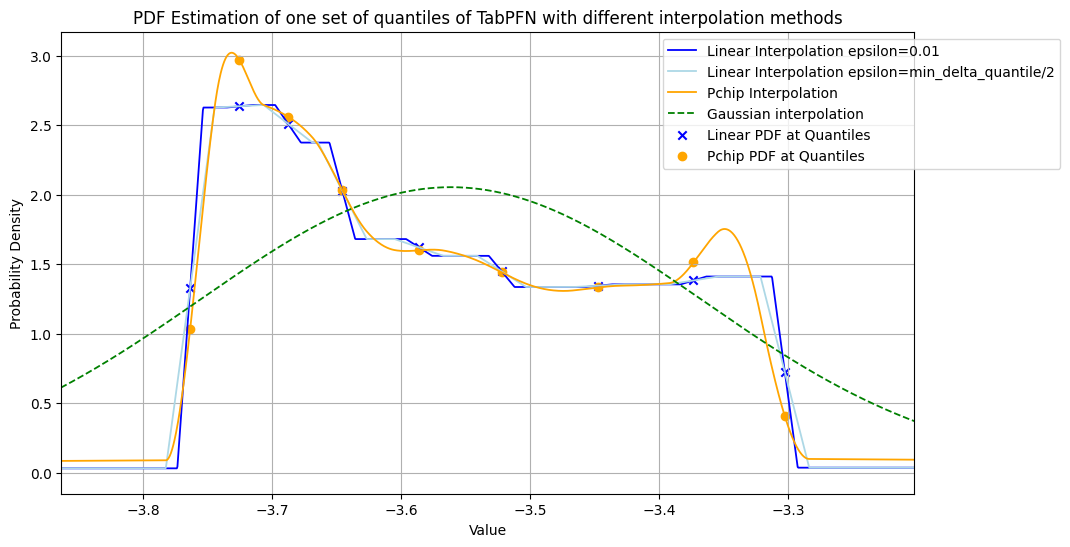

case 2


<Figure size 1100x600 with 0 Axes>

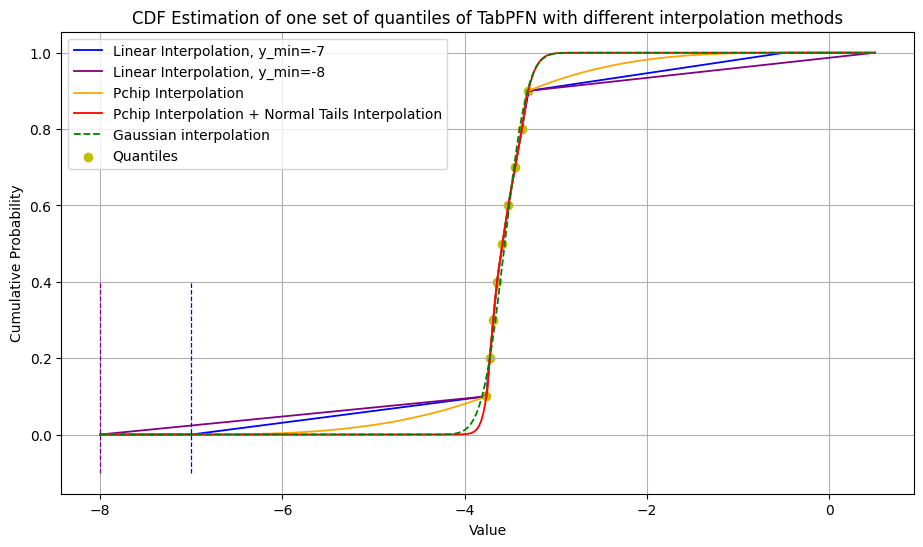

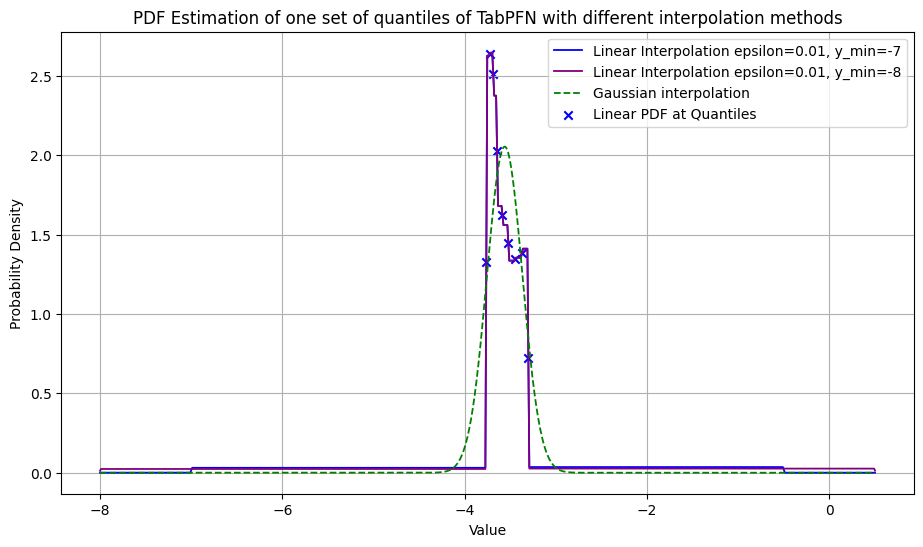

case 3


<Figure size 1100x600 with 0 Axes>

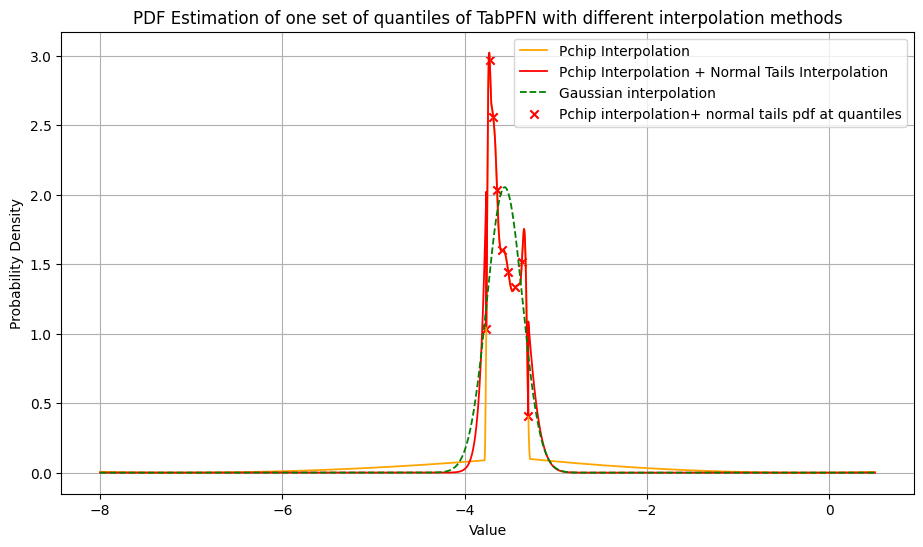

In [36]:
# number = 5, 7, 17
number = 7
quantiles_real = all_quantiles[:,number]
y_min = -7
y_max = -0.5
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

print("case 1")
plot_cdf_pdf_dynamic(quantiles_real, probabilities, y_min, y_max, case=1)
print("case 2")
plot_cdf_pdf_dynamic(quantiles_real, probabilities, y_min, y_max, case=2)
print("case 3")
plot_cdf_pdf_dynamic(quantiles_real, probabilities, y_min, y_max, case=3)

In [35]:
np.min(np.diff(quantiles_real))/2

0.018904805183410645

In [23]:
mu_left, sigma_left = fit_tail_distribution(quantiles_real[:2], probabilities[:2])
mu_right, sigma_right = fit_tail_distribution(quantiles_real[-2:], probabilities[-2:])
sigma_left, sigma_right, mu_left,  mu_right

(0.06064432361476957,
 0.7590552908203003,
 -2.954980995509615,
 -3.4328124034511953)